In [56]:
import polars as pl
import matplotlib.pyplot as plt
import os

In [57]:
current_dir = os.getcwd()
scripts = os.path.dirname(current_dir)
parent_dir = os.path.dirname(scripts)
parent_dir


'd:\\Cours_M2\\webscraping\\ml-webscrap-tennis'

In [58]:
dataset_path = os.path.join(parent_dir, "data", "tennis_dataset_raw.csv")
df = pl.read_csv(dataset_path)
df

player1_name,player1_age,player1_ranking,player1_points,player1_win_rate,player1_win_rate_3_sets,player1_win_rate_tiebreak,player1_total_matches_dure,player1_win_rate_dure,player1_total_matches_terre battue,player1_win_rate_terre battue,player1_total_matches_gazon,player1_win_rate_gazon,player1_total_matches_salle,player1_win_rate_salle,player1_total_matches_carpet,player1_win_rate_carpet,player1_total_matches_acryl,player1_win_rate_acryl,player1_first_serve_pct,player1_first_serve_won_pct,player1_second_serve_won_pct,player1_return_points_won_pct,player1_break_point_won_pct,player1_double_fautes,player1_aces,player1_avg_first_serve_pct,player1_avg_first_serve_won_pct,player1_avg_second_serve_won_pct,player1_avg_return_points_won_pct,player1_avg_break_point_won_pct,player1_avg_double_fautes,player1_avg_aces,player2_name,player2_age,player2_ranking,player2_points,player2_win_rate,player2_win_rate_3_sets,player2_win_rate_tiebreak,player2_total_matches_dure,player2_win_rate_dure,player2_total_matches_terre battue,player2_win_rate_terre battue,player2_total_matches_gazon,player2_win_rate_gazon,player2_total_matches_salle,player2_win_rate_salle,player2_total_matches_carpet,player2_win_rate_carpet,player2_total_matches_acryl,player2_win_rate_acryl,player2_first_serve_pct,player2_first_serve_won_pct,player2_second_serve_won_pct,player2_return_points_won_pct,player2_break_point_won_pct,player2_double_fautes,player2_aces,player2_avg_first_serve_pct,player2_avg_first_serve_won_pct,player2_avg_second_serve_won_pct,player2_avg_return_points_won_pct,player2_avg_break_point_won_pct,player2_avg_double_fautes,player2_avg_aces,surface,tournament_category,target
str,i64,i64,i64,f64,f64,f64,i64,f64,i64,f64,i64,f64,i64,f64,i64,i64,i64,i64,f64,f64,f64,f64,f64,i64,i64,f64,f64,f64,f64,f64,f64,f64,str,i64,i64,i64,f64,f64,f64,i64,f64,i64,f64,i64,f64,i64,f64,i64,i64,i64,i64,f64,f64,f64,f64,f64,i64,i64,f64,f64,f64,f64,f64,f64,f64,str,i64,i64
"""Jannik Sinner""",23,1,11830,0.92,0.857143,1.0,26,0.923077,6,0.833333,10,0.9,8,1.0,0,0,0,0,0.73,0.8,0.56,0.37,0.6,1,15,0.612744,0.794913,0.579725,0.410508,0.410405,1.893939,7.80303,"""Tallon Griekspoor""",28,40,1280,0.5,0.533333,0.608696,14,0.5,16,0.5,7,0.571429,13,0.461538,0,0,0,0,0.66,0.72,0.45,0.27,0.33,3,6,0.641107,0.756507,0.522327,0.322469,0.3861,3.368421,9.051724,"""salle""",1,1
"""Jannik Sinner""",23,1,11830,0.92,0.857143,1.0,26,0.923077,6,0.833333,10,0.9,8,1.0,0,0,0,0,0.65,0.81,0.45,0.44,0.5,0,4,0.612744,0.794913,0.579725,0.410508,0.410405,1.893939,7.80303,"""Alex De Minaur""",25,9,3745,0.66,0.72,0.75,10,0.8,15,0.666667,10,0.8,15,0.466667,0,0,0,0,0.58,0.62,0.48,0.32,1.0,1,5,0.547007,0.738017,0.535661,0.420784,0.451613,2.966667,4.583333,"""salle""",1,1
"""Jannik Sinner""",23,1,11830,0.92,0.857143,1.0,26,0.923077,6,0.833333,10,0.9,8,1.0,0,0,0,0,0.53,0.71,0.63,0.57,0.44,2,7,0.612744,0.794913,0.579725,0.410508,0.410405,1.893939,7.80303,"""Sebastian Baez""",23,27,1690,0.52,0.52381,0.636364,9,0.333333,33,0.69697,3,0.0,5,0.0,0,0,0,0,0.71,0.46,0.36,0.33,0.0,0,1,0.719494,0.6375,0.512132,0.395948,0.405542,1.886792,2.09434,"""salle""",1,1
"""Jannik Sinner""",23,1,11830,0.92,0.857143,1.0,26,0.923077,6,0.833333,10,0.9,8,1.0,0,0,0,0,0.59,0.77,0.59,0.38,0.33,0,6,0.612744,0.794913,0.579725,0.410508,0.410405,1.893939,7.80303,"""Taylor Harry Fritz""",27,4,5100,0.68,0.68,0.625,19,0.684211,10,0.6,12,0.833333,9,0.555556,0,0,0,0,0.59,0.79,0.38,0.3,0.0,0,7,0.627934,0.782078,0.557994,0.353673,0.41039,1.702703,10.635135,"""salle""",3,1
"""Jannik Sinner""",23,1,11830,0.92,0.857143,1.0,26,0.923077,6,0.833333,10,0.9,8,1.0,0,0,0,0,0.59,0.81,0.63,0.54,0.57,0,9,0.612744,0.794913,0.579725,0.410508,0.410405,1.893939,7.80303,"""Casper Ruud""",25,6,4255,0.6,0.681818,0.857143,11,0.545455,25,0.76,2,0.5,12,0.333333,0,0,0,0,0.56,0.64,0.24,0.26,0.0,0,1,0.656933,0.720677,0.535969,0.372298,0.394456,2.149254,5.940299,"""salle""",3,1
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,

In [59]:
df.shape

(6868, 69)

<function matplotlib.pyplot.show(close=None, block=None)>

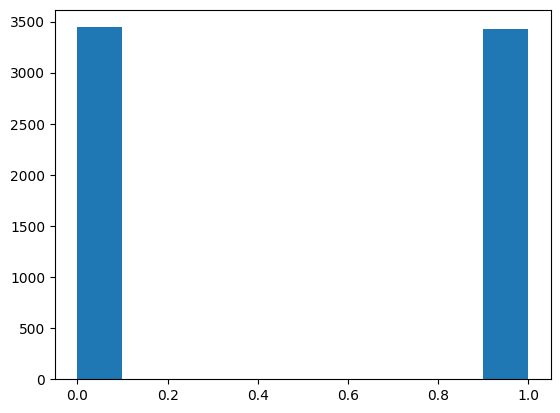

In [60]:
plt.hist(df["target"])
plt.show

In [61]:
df.filter(pl.col("target") == 0).shape[0]

3444

In [62]:
df.filter(pl.col("target") == 1).unique().shape[0]

3421

# Pas de doublon

## exemple de doublon :

In [149]:
ligne_1 = df[0]
ligne_1

player1_name,player1_age,player1_ranking,player1_points,player1_win_rate,player1_win_rate_3_sets,player1_win_rate_tiebreak,player1_total_matches_dure,player1_win_rate_dure,player1_total_matches_terre battue,player1_win_rate_terre battue,player1_total_matches_gazon,player1_win_rate_gazon,player1_total_matches_salle,player1_win_rate_salle,player1_total_matches_carpet,player1_win_rate_carpet,player1_total_matches_acryl,player1_win_rate_acryl,player1_first_serve_pct,player1_first_serve_won_pct,player1_second_serve_won_pct,player1_return_points_won_pct,player1_break_point_won_pct,player1_double_fautes,player1_aces,player1_avg_first_serve_pct,player1_avg_first_serve_won_pct,player1_avg_second_serve_won_pct,player1_avg_return_points_won_pct,player1_avg_break_point_won_pct,player1_avg_double_fautes,player1_avg_aces,player2_name,player2_age,player2_ranking,player2_points,player2_win_rate,player2_win_rate_3_sets,player2_win_rate_tiebreak,player2_total_matches_dure,player2_win_rate_dure,player2_total_matches_terre battue,player2_win_rate_terre battue,player2_total_matches_gazon,player2_win_rate_gazon,player2_total_matches_salle,player2_win_rate_salle,player2_total_matches_carpet,player2_win_rate_carpet,player2_total_matches_acryl,player2_win_rate_acryl,player2_first_serve_pct,player2_first_serve_won_pct,player2_second_serve_won_pct,player2_return_points_won_pct,player2_break_point_won_pct,player2_double_fautes,player2_aces,player2_avg_first_serve_pct,player2_avg_first_serve_won_pct,player2_avg_second_serve_won_pct,player2_avg_return_points_won_pct,player2_avg_break_point_won_pct,player2_avg_double_fautes,player2_avg_aces,surface,tournament_category,target
str,i64,i64,i64,f64,f64,f64,i64,f64,i64,f64,i64,f64,i64,f64,i64,i64,i64,i64,f64,f64,f64,f64,f64,i64,i64,f64,f64,f64,f64,f64,f64,f64,str,i64,i64,i64,f64,f64,f64,i64,f64,i64,f64,i64,f64,i64,f64,i64,i64,i64,i64,f64,f64,f64,f64,f64,i64,i64,f64,f64,f64,f64,f64,f64,f64,str,i64,i64
"""Jannik Sinner""",23,1,11830,0.92,0.857143,1.0,26,0.923077,6,0.833333,10,0.9,8,1.0,0,0,0,0,0.73,0.8,0.56,0.37,0.6,1,15,0.612744,0.794913,0.579725,0.410508,0.410405,1.893939,7.80303,"""Tallon Griekspoor""",28,40,1280,0.5,0.533333,0.608696,14,0.5,16,0.5,7,0.571429,13,0.461538,0,0,0,0,0.66,0.72,0.45,0.27,0.33,3,6,0.641107,0.756507,0.522327,0.322469,0.3861,3.368421,9.051724,"""salle""",1,1


In [150]:
df.filter(
    pl.col("player1_name") == "Tallon Griekspoor",
    pl.col("player2_name") == "Jannik Sinner",
    pl.col("surface") == "salle"
)

player1_name,player1_age,player1_ranking,player1_points,player1_win_rate,player1_win_rate_3_sets,player1_win_rate_tiebreak,player1_total_matches_dure,player1_win_rate_dure,player1_total_matches_terre battue,player1_win_rate_terre battue,player1_total_matches_gazon,player1_win_rate_gazon,player1_total_matches_salle,player1_win_rate_salle,player1_total_matches_carpet,player1_win_rate_carpet,player1_total_matches_acryl,player1_win_rate_acryl,player1_first_serve_pct,player1_first_serve_won_pct,player1_second_serve_won_pct,player1_return_points_won_pct,player1_break_point_won_pct,player1_double_fautes,player1_aces,player1_avg_first_serve_pct,player1_avg_first_serve_won_pct,player1_avg_second_serve_won_pct,player1_avg_return_points_won_pct,player1_avg_break_point_won_pct,player1_avg_double_fautes,player1_avg_aces,player2_name,player2_age,player2_ranking,player2_points,player2_win_rate,player2_win_rate_3_sets,player2_win_rate_tiebreak,player2_total_matches_dure,player2_win_rate_dure,player2_total_matches_terre battue,player2_win_rate_terre battue,player2_total_matches_gazon,player2_win_rate_gazon,player2_total_matches_salle,player2_win_rate_salle,player2_total_matches_carpet,player2_win_rate_carpet,player2_total_matches_acryl,player2_win_rate_acryl,player2_first_serve_pct,player2_first_serve_won_pct,player2_second_serve_won_pct,player2_return_points_won_pct,player2_break_point_won_pct,player2_double_fautes,player2_aces,player2_avg_first_serve_pct,player2_avg_first_serve_won_pct,player2_avg_second_serve_won_pct,player2_avg_return_points_won_pct,player2_avg_break_point_won_pct,player2_avg_double_fautes,player2_avg_aces,surface,tournament_category,target
str,i64,i64,i64,f64,f64,f64,i64,f64,i64,f64,i64,f64,i64,f64,i64,i64,i64,i64,f64,f64,f64,f64,f64,i64,i64,f64,f64,f64,f64,f64,f64,f64,str,i64,i64,i64,f64,f64,f64,i64,f64,i64,f64,i64,f64,i64,f64,i64,i64,i64,i64,f64,f64,f64,f64,f64,i64,i64,f64,f64,f64,f64,f64,f64,f64,str,i64,i64
"""Tallon Griekspoor""",28,40,1280,0.5,0.533333,0.608696,14,0.5,16,0.5,7,0.571429,13,0.461538,0,0,0,0,0.66,0.72,0.45,0.27,0.33,3,6,0.641107,0.756507,0.522327,0.322469,0.3861,3.368421,9.051724,"""Jannik Sinner""",23,1,11830,0.92,0.857143,1.0,26,0.923077,6,0.833333,10,0.9,8,1.0,0,0,0,0,0.73,0.8,0.56,0.37,0.6,1,15,0.612744,0.794913,0.579725,0.410508,0.410405,1.893939,7.80303,"""salle""",1,0


## Tentative de correction

In [63]:
df

player1_name,player1_age,player1_ranking,player1_points,player1_win_rate,player1_win_rate_3_sets,player1_win_rate_tiebreak,player1_total_matches_dure,player1_win_rate_dure,player1_total_matches_terre battue,player1_win_rate_terre battue,player1_total_matches_gazon,player1_win_rate_gazon,player1_total_matches_salle,player1_win_rate_salle,player1_total_matches_carpet,player1_win_rate_carpet,player1_total_matches_acryl,player1_win_rate_acryl,player1_first_serve_pct,player1_first_serve_won_pct,player1_second_serve_won_pct,player1_return_points_won_pct,player1_break_point_won_pct,player1_double_fautes,player1_aces,player1_avg_first_serve_pct,player1_avg_first_serve_won_pct,player1_avg_second_serve_won_pct,player1_avg_return_points_won_pct,player1_avg_break_point_won_pct,player1_avg_double_fautes,player1_avg_aces,player2_name,player2_age,player2_ranking,player2_points,player2_win_rate,player2_win_rate_3_sets,player2_win_rate_tiebreak,player2_total_matches_dure,player2_win_rate_dure,player2_total_matches_terre battue,player2_win_rate_terre battue,player2_total_matches_gazon,player2_win_rate_gazon,player2_total_matches_salle,player2_win_rate_salle,player2_total_matches_carpet,player2_win_rate_carpet,player2_total_matches_acryl,player2_win_rate_acryl,player2_first_serve_pct,player2_first_serve_won_pct,player2_second_serve_won_pct,player2_return_points_won_pct,player2_break_point_won_pct,player2_double_fautes,player2_aces,player2_avg_first_serve_pct,player2_avg_first_serve_won_pct,player2_avg_second_serve_won_pct,player2_avg_return_points_won_pct,player2_avg_break_point_won_pct,player2_avg_double_fautes,player2_avg_aces,surface,tournament_category,target
str,i64,i64,i64,f64,f64,f64,i64,f64,i64,f64,i64,f64,i64,f64,i64,i64,i64,i64,f64,f64,f64,f64,f64,i64,i64,f64,f64,f64,f64,f64,f64,f64,str,i64,i64,i64,f64,f64,f64,i64,f64,i64,f64,i64,f64,i64,f64,i64,i64,i64,i64,f64,f64,f64,f64,f64,i64,i64,f64,f64,f64,f64,f64,f64,f64,str,i64,i64
"""Jannik Sinner""",23,1,11830,0.92,0.857143,1.0,26,0.923077,6,0.833333,10,0.9,8,1.0,0,0,0,0,0.73,0.8,0.56,0.37,0.6,1,15,0.612744,0.794913,0.579725,0.410508,0.410405,1.893939,7.80303,"""Tallon Griekspoor""",28,40,1280,0.5,0.533333,0.608696,14,0.5,16,0.5,7,0.571429,13,0.461538,0,0,0,0,0.66,0.72,0.45,0.27,0.33,3,6,0.641107,0.756507,0.522327,0.322469,0.3861,3.368421,9.051724,"""salle""",1,1
"""Jannik Sinner""",23,1,11830,0.92,0.857143,1.0,26,0.923077,6,0.833333,10,0.9,8,1.0,0,0,0,0,0.65,0.81,0.45,0.44,0.5,0,4,0.612744,0.794913,0.579725,0.410508,0.410405,1.893939,7.80303,"""Alex De Minaur""",25,9,3745,0.66,0.72,0.75,10,0.8,15,0.666667,10,0.8,15,0.466667,0,0,0,0,0.58,0.62,0.48,0.32,1.0,1,5,0.547007,0.738017,0.535661,0.420784,0.451613,2.966667,4.583333,"""salle""",1,1
"""Jannik Sinner""",23,1,11830,0.92,0.857143,1.0,26,0.923077,6,0.833333,10,0.9,8,1.0,0,0,0,0,0.53,0.71,0.63,0.57,0.44,2,7,0.612744,0.794913,0.579725,0.410508,0.410405,1.893939,7.80303,"""Sebastian Baez""",23,27,1690,0.52,0.52381,0.636364,9,0.333333,33,0.69697,3,0.0,5,0.0,0,0,0,0,0.71,0.46,0.36,0.33,0.0,0,1,0.719494,0.6375,0.512132,0.395948,0.405542,1.886792,2.09434,"""salle""",1,1
"""Jannik Sinner""",23,1,11830,0.92,0.857143,1.0,26,0.923077,6,0.833333,10,0.9,8,1.0,0,0,0,0,0.59,0.77,0.59,0.38,0.33,0,6,0.612744,0.794913,0.579725,0.410508,0.410405,1.893939,7.80303,"""Taylor Harry Fritz""",27,4,5100,0.68,0.68,0.625,19,0.684211,10,0.6,12,0.833333,9,0.555556,0,0,0,0,0.59,0.79,0.38,0.3,0.0,0,7,0.627934,0.782078,0.557994,0.353673,0.41039,1.702703,10.635135,"""salle""",3,1
"""Jannik Sinner""",23,1,11830,0.92,0.857143,1.0,26,0.923077,6,0.833333,10,0.9,8,1.0,0,0,0,0,0.59,0.81,0.63,0.54,0.57,0,9,0.612744,0.794913,0.579725,0.410508,0.410405,1.893939,7.80303,"""Casper Ruud""",25,6,4255,0.6,0.681818,0.857143,11,0.545455,25,0.76,2,0.5,12,0.333333,0,0,0,0,0.56,0.64,0.24,0.26,0.0,0,1,0.656933,0.720677,0.535969,0.372298,0.394456,2.149254,5.940299,"""salle""",3,1
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,

clé primaire = player1_name, player1_stats[20:26], player2_name, player2_stats[53:59], surface, tournament, target

In [65]:
col_stats_joueur_1 = df.columns[19:26]
col_stats_joueur_2 = df.columns[52:59]
der_cols = ["surface", "tournament", "target"]
primary_key = [
    "player1_name",
    *col_stats_joueur_1,
    "player2_name",
    *col_stats_joueur_2,
    *der_cols
]
primary_key

['player1_name',
 'player1_first_serve_pct',
 'player1_first_serve_won_pct',
 'player1_second_serve_won_pct',
 'player1_return_points_won_pct',
 'player1_break_point_won_pct',
 'player1_double_fautes',
 'player1_aces',
 'player2_name',
 'player2_first_serve_pct',
 'player2_first_serve_won_pct',
 'player2_second_serve_won_pct',
 'player2_return_points_won_pct',
 'player2_break_point_won_pct',
 'player2_double_fautes',
 'player2_aces',
 'surface',
 'tournament',
 'target']

In [102]:
df_player1 = df.select([col for col in df.columns if "player1" in col]).filter(pl.col("player1_name") == "Jannik Sinner")
df_player1.shape

(50, 33)

In [82]:
df_player2 = df.select([col for col in df.columns if "player2" in col]).filter(pl.col("player2_name") == "Jannik Sinner")
df_player2.shape

(69, 33)

In [99]:
df_player2

player2_name,player2_age,player2_ranking,player2_points,player2_win_rate,player2_win_rate_3_sets,player2_win_rate_tiebreak,player2_total_matches_dure,player2_win_rate_dure,player2_total_matches_terre battue,player2_win_rate_terre battue,player2_total_matches_gazon,player2_win_rate_gazon,player2_total_matches_salle,player2_win_rate_salle,player2_total_matches_carpet,player2_win_rate_carpet,player2_total_matches_acryl,player2_win_rate_acryl,player2_first_serve_pct,player2_first_serve_won_pct,player2_second_serve_won_pct,player2_return_points_won_pct,player2_break_point_won_pct,player2_double_fautes,player2_aces,player2_avg_first_serve_pct,player2_avg_first_serve_won_pct,player2_avg_second_serve_won_pct,player2_avg_return_points_won_pct,player2_avg_break_point_won_pct,player2_avg_double_fautes,player2_avg_aces
str,i64,i64,i64,f64,f64,f64,i64,f64,i64,f64,i64,f64,i64,f64,i64,i64,i64,i64,f64,f64,f64,f64,f64,i64,i64,f64,f64,f64,f64,f64,f64,f64
"""Jannik Sinner""",23,1,11830,0.92,0.857143,1.0,26,0.923077,6,0.833333,10,0.9,8,1.0,0,0,0,0,0.62,0.7,0.64,0.35,0.5,1,12,0.612744,0.794913,0.579725,0.410508,0.410405,1.893939,7.80303
"""Jannik Sinner""",23,1,11830,0.92,0.857143,1.0,26,0.923077,6,0.833333,10,0.9,8,1.0,0,0,0,0,0.55,0.66,0.53,0.34,0.33,4,6,0.612744,0.794913,0.579725,0.410508,0.410405,1.893939,7.80303
"""Jannik Sinner""",23,1,11830,0.92,0.857143,1.0,26,0.923077,6,0.833333,10,0.9,8,1.0,0,0,0,0,0.56,0.74,0.46,0.41,0.6,8,7,0.612744,0.794913,0.579725,0.410508,0.410405,1.893939,7.80303
"""Jannik Sinner""",23,1,11830,0.92,0.857143,1.0,26,0.923077,6,0.833333,10,0.9,8,1.0,0,0,0,0,0.59,0.77,0.59,0.38,0.33,0,6,0.612744,0.794913,0.579725,0.410508,0.410405,1.893939,7.80303
"""Jannik Sinner""",23,1,11830,0.92,0.857143,1.0,26,0.923077,6,0.833333,10,0.9,8,1.0,0,0,0,0,0.59,0.77,0.59,0.38,0.33,0,6,0.612744,0.794913,0.579725,0.410508,0.410405,1.893939,7.80303
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Jannik Sinner""",23,1,11830,0.92,0.857143,1.0,26,0.923077,6,0.833333,10,0.9,8,1.0,0,0,0,0,0.58,0.79,0.49,0.39,0.8,3,16,0.612744,0.794913,0.579725,0.410508,0.410405,1.893939,7.80303
"""Jannik Sinner""",23,1,11830,0.92,0.857143,1.0,26,0.923077,6,0.833333,10,0.9,8,1.0,0,0,0,0,0.61,0.78,0.51,0.47,0.5,4,6,0.612744,0.794913,0.579725,0.410508,0.410405,1.893939,7.80303
"""Jannik Sinner""",23,1,11830,0.92,0.857143,1.0,26,0.923077,6,0.833333,10,0.9,8,1.0,0,0,0,0,0.76,0.79,0.5,0.47,0.71,3,8,0.612744,0.794913,0.579725,0.410508,0.410405,1.893939,7.80303


In [84]:
df_renamed = df_player2.rename({col: col.replace("player2", "player1") for col in df_player2.columns})

In [85]:
df_combined = df_player1.vstack(df_renamed)

In [88]:
df_combined.unique()

player1_name,player1_age,player1_ranking,player1_points,player1_win_rate,player1_win_rate_3_sets,player1_win_rate_tiebreak,player1_total_matches_dure,player1_win_rate_dure,player1_total_matches_terre battue,player1_win_rate_terre battue,player1_total_matches_gazon,player1_win_rate_gazon,player1_total_matches_salle,player1_win_rate_salle,player1_total_matches_carpet,player1_win_rate_carpet,player1_total_matches_acryl,player1_win_rate_acryl,player1_first_serve_pct,player1_first_serve_won_pct,player1_second_serve_won_pct,player1_return_points_won_pct,player1_break_point_won_pct,player1_double_fautes,player1_aces,player1_avg_first_serve_pct,player1_avg_first_serve_won_pct,player1_avg_second_serve_won_pct,player1_avg_return_points_won_pct,player1_avg_break_point_won_pct,player1_avg_double_fautes,player1_avg_aces
str,i64,i64,i64,f64,f64,f64,i64,f64,i64,f64,i64,f64,i64,f64,i64,i64,i64,i64,f64,f64,f64,f64,f64,i64,i64,f64,f64,f64,f64,f64,f64,f64
"""Jannik Sinner""",23,1,11830,0.92,0.857143,1.0,26,0.923077,6,0.833333,10,0.9,8,1.0,0,0,0,0,0.67,0.71,0.47,0.49,0.46,0,3,0.612744,0.794913,0.579725,0.410508,0.410405,1.893939,7.80303
"""Jannik Sinner""",23,1,11830,0.92,0.857143,1.0,26,0.923077,6,0.833333,10,0.9,8,1.0,0,0,0,0,0.61,0.76,0.65,0.29,0.0,0,8,0.612744,0.794913,0.579725,0.410508,0.410405,1.893939,7.80303
"""Jannik Sinner""",23,1,11830,0.92,0.857143,1.0,26,0.923077,6,0.833333,10,0.9,8,1.0,0,0,0,0,0.65,0.81,0.61,0.36,1.0,1,8,0.612744,0.794913,0.579725,0.410508,0.410405,1.893939,7.80303
"""Jannik Sinner""",23,1,11830,0.92,0.857143,1.0,26,0.923077,6,0.833333,10,0.9,8,1.0,0,0,0,0,0.6,0.88,0.56,0.37,0.5,3,7,0.612744,0.794913,0.579725,0.410508,0.410405,1.893939,7.80303
"""Jannik Sinner""",23,1,11830,0.92,0.857143,1.0,26,0.923077,6,0.833333,10,0.9,8,1.0,0,0,0,0,0.68,0.82,0.67,0.42,0.5,1,1,0.612744,0.794913,0.579725,0.410508,0.410405,1.893939,7.80303
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Jannik Sinner""",23,1,11830,0.92,0.857143,1.0,26,0.923077,6,0.833333,10,0.9,8,1.0,0,0,0,0,0.58,0.8,0.47,0.43,0.31,3,4,0.612744,0.794913,0.579725,0.410508,0.410405,1.893939,7.80303
"""Jannik Sinner""",23,1,11830,0.92,0.857143,1.0,26,0.923077,6,0.833333,10,0.9,8,1.0,0,0,0,0,0.51,0.74,0.61,0.39,0.4,4,9,0.612744,0.794913,0.579725,0.410508,0.410405,1.893939,7.80303
"""Jannik Sinner""",23,1,11830,0.92,0.857143,1.0,26,0.923077,6,0.833333,10,0.9,8,1.0,0,0,0,0,null,null,null,null,null,null,null,0.612744,0.794913,0.579725,0.410508,0.410405,1.893939,7.80303


In [97]:
nom_joueurs = df.select("player1_name").unique().to_series().to_list()
nom_joueurs

['Jaume Antoni Munar Clar',
 'Alex De Minaur',
 'Alejandro Moro Canas',
 'Arthur Rinderknech',
 'James Kent Trotter',
 'Leandro Riedi',
 'Juan Manuel Cerundolo',
 'Nicolas Moreno De Alboran',
 'Damir Dzumhur',
 'Sho Shimabukuro',
 'Marton Fucsovics',
 'Thiago Moura Monteiro',
 'Roberto Bautista Agut',
 'Tallon Griekspoor',
 'Omar Jasika',
 'Tomas Barrios Vera',
 'Stefanos Tsitsipas',
 'Mattia Bellucci',
 'Yuta Shimizu',
 'Pablo Carreno-Busta',
 'Chun Hsin Tseng',
 'Jesper De Jong',
 'Murkel Alejandro Dellien Velasco',
 'Cristian Garin',
 'Novak Djokovic',
 'Sebastian Baez',
 'Cameron Norrie',
 'Daniel Evans',
 'Ugo Humbert',
 'Albert Ramos-Vinolas',
 'Brandon Nakashima',
 'Gustavo Heide',
 'Lucas Pouille',
 'Daniil Medvedev',
 'Paul Jubb',
 'Clement Chidekh',
 'Zachary Svajda',
 'Frances Tiafoe',
 'Bu Yunchaokete',
 'Botic Van De Zandschulp',
 'Mikhail Kukushkin',
 'Titouan Droguet',
 'Juncheng Shang',
 'Alex Bolt',
 'Tommy Paul',
 'Mitchell Krueger',
 'Laslo Djere',
 'Valentin Royer',